<a href="https://colab.research.google.com/github/julien-medina-phd/dataquest-scikit-learn-tutorial/blob/master/dataquest_scikit_learn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="8">**Scikit-learn Tutorial: Machine Learning in Python: https://www.dataquest.io/blog/sci-kit-learn-tutorial/**</font>

<font size="8">**Importing the data set**</font>

In [0]:
#import necessary modules
import pandas as pd
#store the url in a variable
url = "https://raw.githubusercontent.com/vkrit/data-science-class/master/WA_Fn-UseC_-Sales-Win-Loss.csv"

In [0]:
# Read in the data with `read_csv()`
sales_data = pd.read_csv(url)

<font size="8">**Data Exploration**</font>

In [0]:
sales_data

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.00000,0.000000,0.000000,6
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.00000,0.000000,0.000000,5
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.00000,0.000000,0.000000,4
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.00000,0.000000,0.000000,5


In [0]:
# using the dtypes() method to display the different datatypes available
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

<font size="8">**Data Visualization**</font>

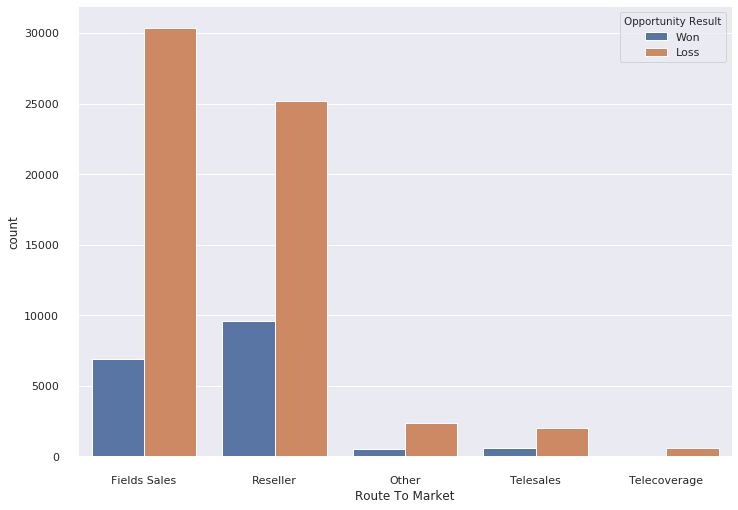

In [0]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plotplt.show()

In [0]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(16.7,13.27)})

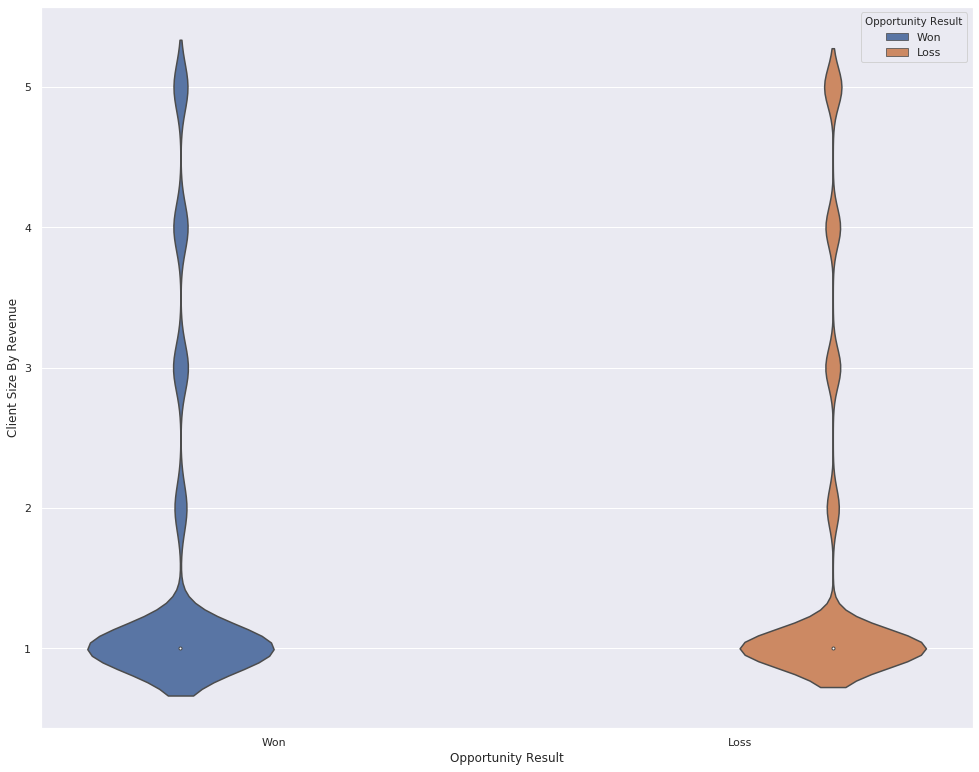

In [0]:
# plotting the violinplot
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()

<font size="8">**Preprocessing Data**</font>

**We saw in our initial exploration that most of the columns in our data set are strings, but the algorithms in scikit-learn understand only numeric data. Luckily, the scikit-learn library provides us with many methods for converting string data into numerical data. One such method is the LabelEncoder() method. We will use this method to convert the categorical labels in our data set like ‘won’ and ‘loss’ into numerical labels.**

In [0]:
print("Supplies Subgroup' : ",sales_data['Supplies Subgroup'].unique())
print("Region : ",sales_data['Region'].unique())
print("Route To Market : ",sales_data['Route To Market'].unique())
print("Opportunity Result : ",sales_data['Opportunity Result'].unique())
print("Competitor Type : ",sales_data['Competitor Type'].unique())
print("'Supplies Group : ",sales_data['Supplies Group'].unique())

Supplies Subgroup' :  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result :  ['Won' 'Loss']
Competitor Type :  ['Unknown' 'Known' 'None']
'Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


In [0]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])
#display the initial records
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


<font size="8">**Training Set & Test Set**</font>

**A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable. For this we need to divide the entire data set into two sets. One is the training set on which we are going to train our algorithm to build a model. The other is the testing set on which we will test our model to see how accurate its predictions are.**

In [0]:
# select columns other than 'Opportunity Number','Opportunity Result'cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = sales_data[[col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]]
#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']

In [0]:
data

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,5,2,4,2,24,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,8,2,1,2,16,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,2,0,4,2,69,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,0,0,5,2,0,2,0,0,250000,1,1,3,2,0.00000,0.000000,0.000000,6
78021,8,2,2,2,0,1,0,0,180000,1,1,0,2,0.00000,0.000000,0.000000,5
78022,2,0,5,2,0,2,0,0,90000,1,1,0,2,0.00000,0.000000,0.000000,4
78023,2,0,5,0,0,2,0,0,120000,1,1,0,2,1.00000,0.000000,0.000000,5


In [0]:
target

0        1
1        0
2        1
3        0
4        0
        ..
78020    0
78021    1
78022    0
78023    0
78024    0
Name: Opportunity Result, Length: 78025, dtype: int64

**OK, so what did we just do? First, we don’t need the ‘Opportunity Number’ column as it is just a unique identifier for each record. Also, we want to predict the ‘Opportunity Result’, so it should be our ‘target’ rather than part of ‘data’. So, in the first line of the code above, we selected only the columns which didn’t match ‘Opportunity Number’and ‘Opportunity Result’ and assigned them to a variable cols. Next, we created a new dataframe data with the columns in the list cols. This will serve as our feature set. Then we took the ‘Opportunity Result’ column from the dataframe sales_data and created a new dataframe target.**

In [0]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

<font size="8">**Building The Model**</font>

![title](https://scikit-learn.org/stable/_static/ml_map.png)

We can use this map as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. Using the checklist let’s see under which category we fall:

More than 50 samples – Check
Are we predicting a category – Check
We have labeled data? ( data with clear names like opportunity amount etc.) – Check
Less than 100k samples – Check
Based on the checklist that we prepared above and going by the machine_learning_map we can try out the below mentioned algorithms.

Naive Bayes
Linear SVC
K-Neighbours Classifier
The real beauty of the scikit-learn library is that it exposes high level APIs for different algorithms, making it easier for us to try out different algorithms and compare the accuracy of the models to see what works best for our data set.

Let’s begin trying out the different algorithms one by one.

<font size="5">**Naive-Bayes**</font>

**The algorithm that we are going to use for our sales data is the Gaussian Naive Bayes**

In [0]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7590567327409433


<font size="5">**LinearSVC**</font>

**LinearSVC or Linear Support Vector Classification is a subclass of the SVM (Support Vector Machine) class. We won’t go into the intricacies of the mathematics involved in this class of algorithms, but on a very basic level LinearSVC tries to divide the data into different planes so that it can find a best possible grouping of different classes.**

In [0]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.4606971975393028


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<font size="5">**K-Neighbors Classifier**</font>

In [0]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.8145505809979494


<font size="8">**Performance Comparison**</font>

From http://www.scikit-yb.org/en/latest/tutorial.html#visual-model-evaluation

Precision is the number of correct positive results divided by the number of all positive results (e.g. How many of the mushrooms we predicted would be edible actually were?).

Recall is the number of correct positive results divided by the number of positive results that should have been returned (e.g. How many of the mushrooms that were poisonous did we accurately predict were poisonous?).

The F1 score is a measure of a test’s accuracy. It considers both the precision and the recall of the test to compute the score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.

<font size="5">**GaussianNB**</font>

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


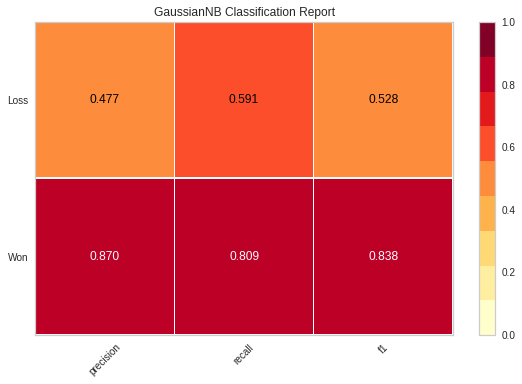

In [0]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

<font size="5">**LinearSVC**</font>

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


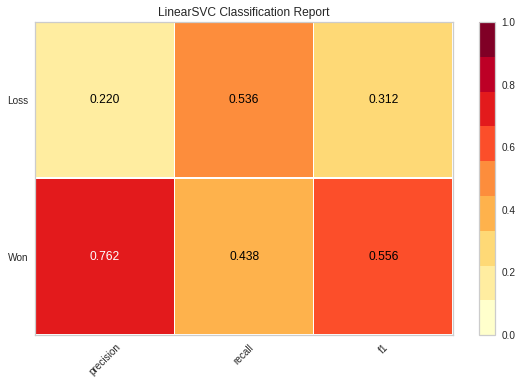

In [0]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

<font size="5">**KNeighborsClassifier**</font>

c:\users\julien\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


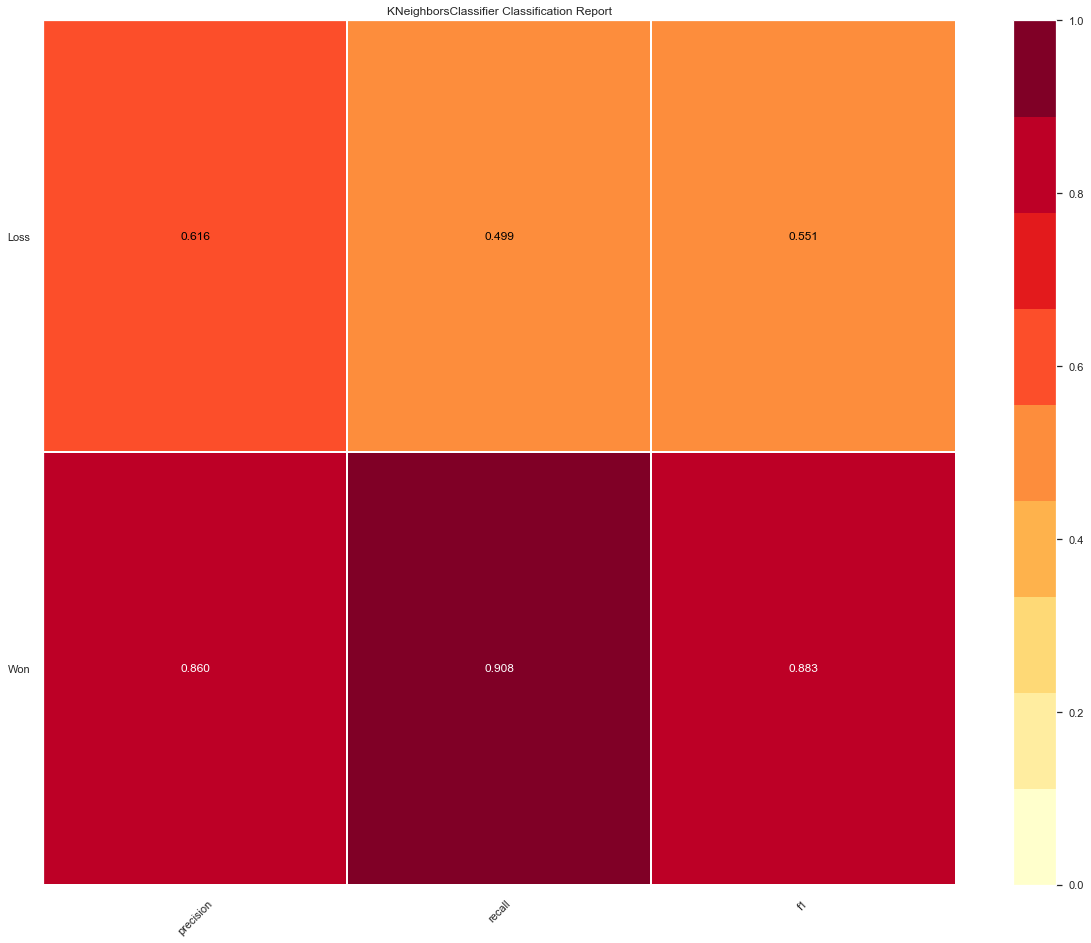

In [0]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data